In [51]:
import numpy, pandas

import matplotlib.pyplot as plt

In [45]:
with open('./data/NC_000962.3_pncA.fasta','r') as INPUT:
    INPUT.readline()
    pncA_sequence = INPUT.readline()

In [46]:
aminoacids = 'FFLLSSSSYY!!CC!WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
bases = ['t', 'c', 'a', 'g']
all_codons = numpy.array([a+b+c for a in bases for b in bases for c in bases])
codon_to_amino_acid = dict(zip(all_codons, aminoacids))


In [102]:
index = 1

maximum_amino_acids = []
amino_acid_position = []

for codon in [pncA_sequence[i:i+3] for i in range(0,len(pncA_sequence),3)]:
    
    aminoacid = codon_to_amino_acid[codon]
    mutations = []

    for pos in [0, 1, 2]:
        for i in bases:
            if codon[pos] != i:
                new_codon = codon[:pos] + i + codon[pos+1:]
                new_aminoacid = codon_to_amino_acid[new_codon]

                if new_aminoacid != aminoacid and new_aminoacid not in mutations and new_aminoacid!="!":
                    mutations.append(new_aminoacid)

    # print(index, len(mutations))

    maximum_amino_acids.append(len(mutations))
    amino_acid_position.append(index)
    
    index+=1

max_aa = pandas.DataFrame(maximum_amino_acids, index=amino_acid_position, columns=['MAX'])

In [54]:
DATASET = pandas.read_csv('data/ds-traintest-phen.csv')
DATASET[:3]

,MUTATION,CONSISTENT_PHENOTYPE
0,A102V,S
1,A134D,S
2,A134P,R


In [55]:
DATASET.reset_index(inplace=True)
def find_position(row):
    return int(row.MUTATION[1:-1])

DATASET['POSITION'] = DATASET.apply(find_position, axis=1)

In [103]:
total = pandas.crosstab(DATASET.POSITION, DATASET.CONSISTENT_PHENOTYPE)
total['TOTAL'] = total.R + total.S
total['frac_R'] = total['R'] / total['TOTAL']
total = total.join(max_aa)
total

,R,S,TOTAL,frac_R,MAX
POSITION,,,,,
1,2,1,3,0.666667,6
2,0,1,1,0.000000,5
3,1,2,3,0.333333,6
4,4,1,5,0.800000,5
5,5,1,6,0.833333,7
...,...,...,...,...,...
181,1,1,2,0.500000,6
182,1,1,2,0.500000,5
183,1,2,3,0.333333,6


In [104]:
xs=[0.5]
ys=[0]
yt=[0]

prev_idx=0
for idx,row in total.iterrows():
    if idx-prev_idx!=1:
        print(idx, prev_idx)
    if idx==151:
        xs.append(149.5)
        xs.append(150.5)
        ys.append(0)
        ys.append(0)
        yt.append(0)
        yt.append(0)
    prev_idx=idx
    xs.append(idx-0.5)
    xs.append(idx+0.5)
    ys.append(row.TOTAL)
    ys.append(row.TOTAL)
    yt.append(row.MAX)
    yt.append(row.MAX)

151 149


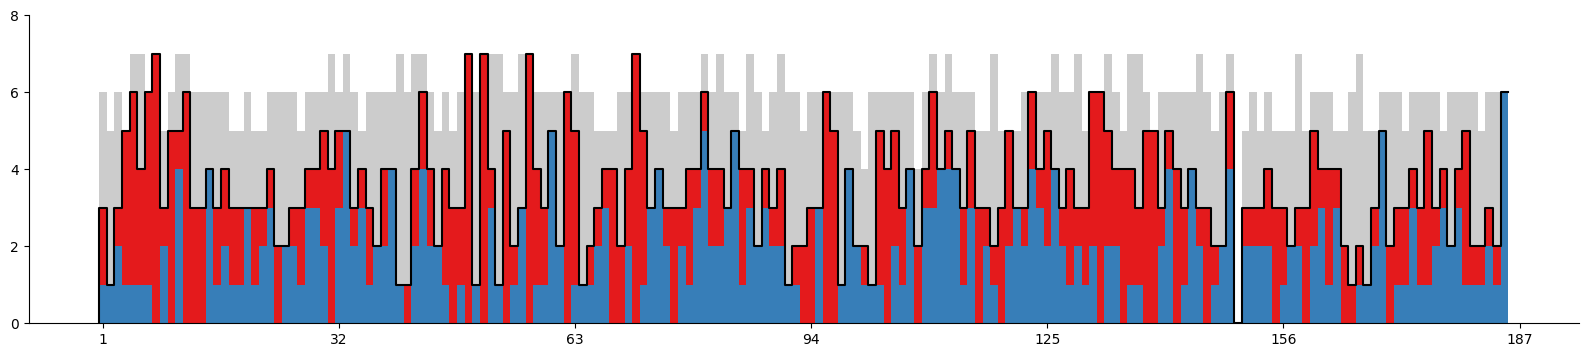

In [109]:
fig,axes=plt.subplots(1,1,figsize=(20,4))
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_ylim([0,7])
axes.set_yticks(range(0,10,2))
axes.set_xticks(range(1,188,31))
axes.bar(total.index, total.MAX, width=1, color='#cccccc')
axes.bar(total.index, total.S, width=1, color='#377eb8')
axes.bar(total.index, total.R, bottom=total.S, width=1, color='#e41a1c')
axes.plot(xs,ys, color='black')
# axes.plot(xs,yt, color='black')
fig.savefig('pdf/fig-1_hist-codon.pdf')